# Calculate Diffuse Gamma ray flux using parametrization in Ch11 of Tom's book

### ---Differential Flux for Gamma rays:
### $ \frac{d\phi_\gamma(E_\gamma, l, b)}{dE_\gamma \, dA \, dt \, d\Omega} = \frac{q_\gamma \, (E_\gamma)}{4 \pi} \int_0^\inf n_H (r) \, p_\gamma(r, E_\gamma) dr  $ Equation (11.20)*
### where $\int_0^\inf n_H (r) \, p_\gamma(r,E_\gamma) dr$ is integrating the proton density along the line of sight for a given lattitude (l) , longitude(b) with survival probability $p_\gamma(r,E_\gamma)$ for a $E_\gamma$ photon produced at a distance $r$ from Sun

### ---Gamma-ray emissivity = photons produced per second per ISM hydrogen atom
### $ q_\gamma (E_\gamma) = \int_{E_\gamma}^\inf 2 \, \frac{q_{\pi^0}(E_{\pi^0})}{E_{\pi^0}}  \, dE_{\pi^0} $
### (Re-writing equation 11.2)
### where, $q_{\pi^0}$ is the pion emissivity i.e. neutral pions produced per second per ISM hydrogen atom,  factor of 2 arises due to $ \pi^0 \rightarrow 2 \gamma $


### ---Neutral pion emissivity is given by 
### $ q_{\pi^0} (E_{\pi^0}) = 4 \pi \, \int_{E_{\pi^0}}^\inf \frac{\sigma_{pp}(E_p) \, Z_{p\pi^0}(E_p)}{E_{p}}\,  N_0 (E_p) dE_p $  (Expanding on equation 11.1)
### $4 \pi$ accounts for the isotropic flux of nucleons from the disk of the Galaxy


## Assumptions involved in the calculation:
### 1.) Nucleon spectrum throughout Galaxy is same as measured at Earth (see discussion after Eq 11.19)
### 2.) For calculation of Z factors:
### 2a.)Nucleon spectrum model (H3a/GST)
### 2b.) Hadronic Interaction model (SIBYLL 2.3 /2.1/ QGSJET /EPOS)
### 3.) pp cross section value (30mb constant or tabulated values from pdg)
### 4.) Pion decay is the only source of diffuse gamma rays (small leptonic contribution is shown in fig. 11.3)


In [1]:
## Extra notes
#### $N_0(E_\gamma)$ is differential nucelon spectrum evaluated at $E_\gamma$

#### $\alpha$ is the differential spectral index of nucleon spectrum

#### We have Nucleon spectrum as given by H3a is $N_0(E_p)$ 

### $N_0(E_\gamma) = \int_{E_\gamma}^{\inf} \frac{2}{E_{\pi^0}} N_0(E_{\pi^0}) d E_{\pi^0} $

### $N_0(E_{\pi^0}) = \int_{E_\pi^0}^{\inf} \frac{\sigma_{pp} (E_{p}) \ Z_{p\pi^0}(E_{p})}{\alpha(E_p) \ E_{p}} \  N_0(E_p) d E_p $


In [2]:
#import libraries
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

### Step1 : Tabulate $q_{\pi^0}$ values for a range of $E_{\pi^0}$

In [3]:
# load z-factors
zfactors= np.loadtxt('EZfactors_11_02-s.dat').T
z_E =zfactors[0]
z_alpha=zfactors[1]
z_z =zfactors[2]

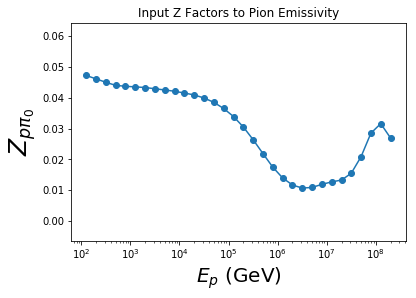

In [4]:
#plot z-factors
plt.title('Input Z Factors to Pion Emissivity')
plt.scatter(z_E,z_z)
plt.plot(z_E,z_z)
plt.ylabel(r'$Z_{p \pi_0}$',fontsize=25)
plt.xlabel('$E_p$ (GeV)',fontsize=20)
plt.xscale('log')

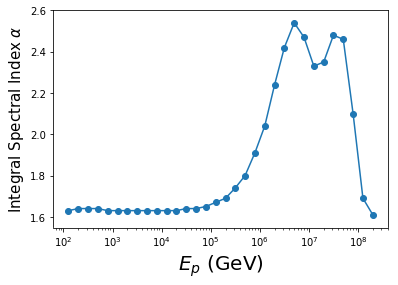

In [5]:
#plot integral spectral index
plt.scatter(z_E,z_alpha)
plt.plot(z_E,z_alpha)
plt.ylabel(r'Integral Spectral Index $\alpha$',fontsize=15)
plt.xlabel('$E_p$ (GeV)',fontsize=20)
plt.xscale('log')
#plt.xlim([1e5,1e9])

In [6]:
#load nucleon spectrum h3a
nucleons=np.loadtxt('allnucleon-H3a-test2.dat').T
nucleon_E=nucleons[0]
nucleon_N=nucleons[-1]
nucleon_p=nucleons[1]
nucleon_fe=nucleons[-2]

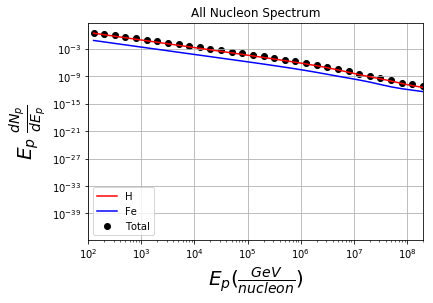

In [7]:
#plot z-factors
plt.figure()#figsize=(12,12))
plt.scatter(nucleon_E,nucleon_N,color='k',label='Total')
plt.plot(nucleon_E,nucleon_p,color='r',label='H')
plt.plot(nucleon_E,nucleon_fe,color='b',label='Fe')
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$E_p\; \frac{dN_p}{dE_p} $',fontsize=20)
plt.xlabel(r'$E_p (\frac{GeV}{nucleon})$',fontsize=20)
plt.legend()
plt.title('All Nucleon Spectrum')
plt.grid()
c=plt.xlim([1e2,2e8])
#plt.ylim(ymin=1e-19)

In [8]:
# pp Cross sections 
f=open('rpp2014-pp_total.dat','r')
counter=0
plab=[]
sigma=[]
for line in f:
    counter+=1
    if counter<12:
        continue
    temp=line.split()
    plab.append(np.float(temp[1]))
    sigma.append(np.float(temp[4]))
f.close()
plab=np.array(plab)
sigma=np.array(sigma)

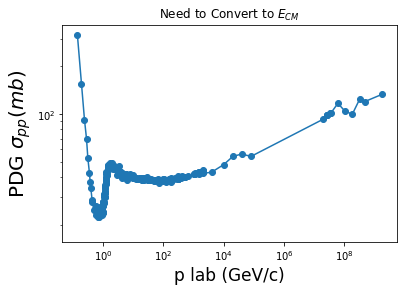

In [9]:
#plot pp cross section
plt.plot(plab,sigma)
plt.scatter(plab,sigma)
plt.ylabel(r'PDG $\sigma_{pp} (mb) $',fontsize=20)
plt.xlabel('p lab (GeV/c)',fontsize=17)
plt.yscale('log')
plt.xscale('log')
c=plt.title('Need to Convert to $E_{CM}$')
#plt.xlim([1e5,1e9])